In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Cleaning and Preparation**

In [14]:
# Load dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\Cardiotocographic.csv")

# Preview data
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [15]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [16]:
# Check missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [17]:
# Handle missing values
# Example: Impute with median for numeric features
df.fillna(df.median(), inplace=True)

In [18]:
# Check for duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
# Convert datatypes if needed
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:

# Handle outliers (Z-score method)
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

# **Statistical Summary**

In [19]:
# Summary statistics
df.describe()

# Median and IQR
summary = df.describe().T
summary["median"] = df.median()
summary["IQR"] = summary["75%"] - summary["25%"]
summary


,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2124.0,133.338641,11.212447,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2124.0,0.003205,0.004374,-0.019284,0.000000,0.001634,0.005612,0.038567,0.001634,0.005612
FM,2124.0,0.009904,0.067571,-0.480634,0.000000,0.000000,0.002568,0.961268,0.000000,0.002568
UC,2124.0,0.004394,0.003340,-0.014925,0.001858,0.004486,0.006536,0.030002,0.004486,0.004678
DL,2124.0,0.001897,0.003344,-0.015393,0.000000,0.000000,0.003292,0.030769,0.000000,0.003292
DS,2124.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2124.0,0.000174,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2124.0,47.012459,18.812403,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2124.0,1.364345,1.174084,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2124.0,10.295650,21.212676,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


# **Data Visualization**

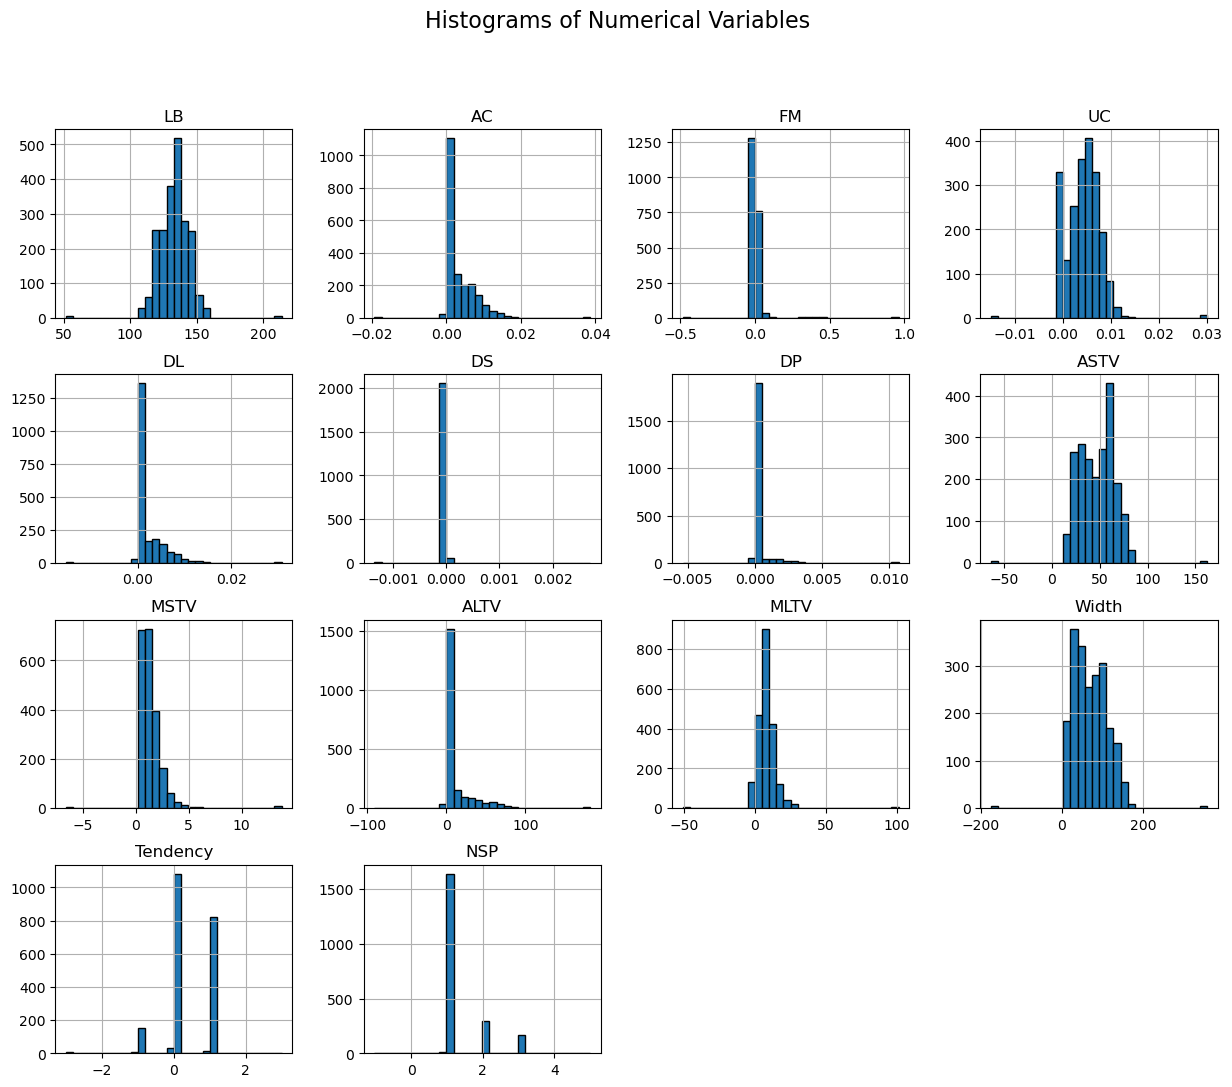

In [20]:
# Histograms for all numeric variables
df.hist(figsize=(15,12), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8692\2592317886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=df, palette="Set2")


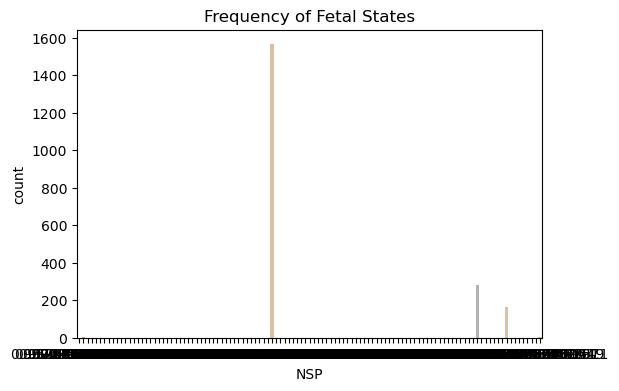

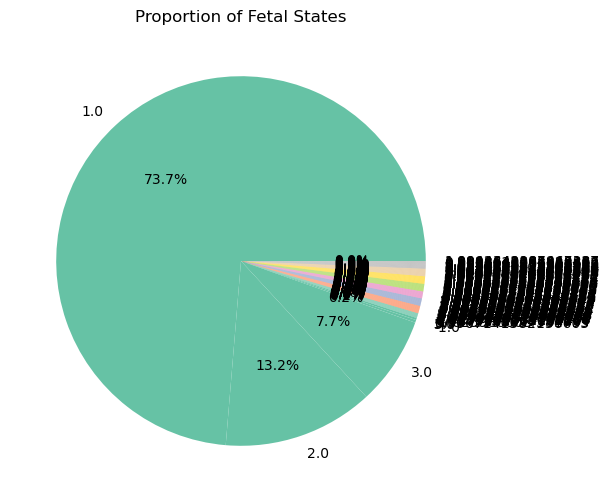

In [21]:
# Bar chart of categorical variable
if "NSP" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="NSP", data=df, palette="Set2")
    plt.title("Frequency of Fetal States")
    plt.show()


     # Pie chart
    df["NSP"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6), colormap="Set2")
    plt.title("Proportion of Fetal States")
    plt.ylabel("")
    plt.show()

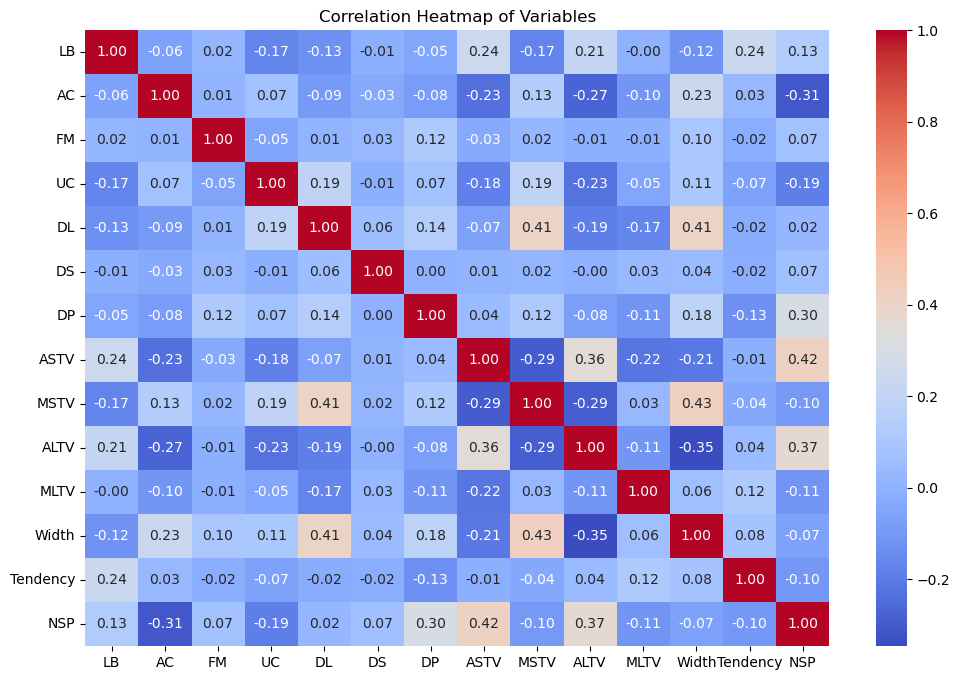

In [22]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Variables")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18584\2040083745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="NSP", y="LB", data=df, palette="Set2")


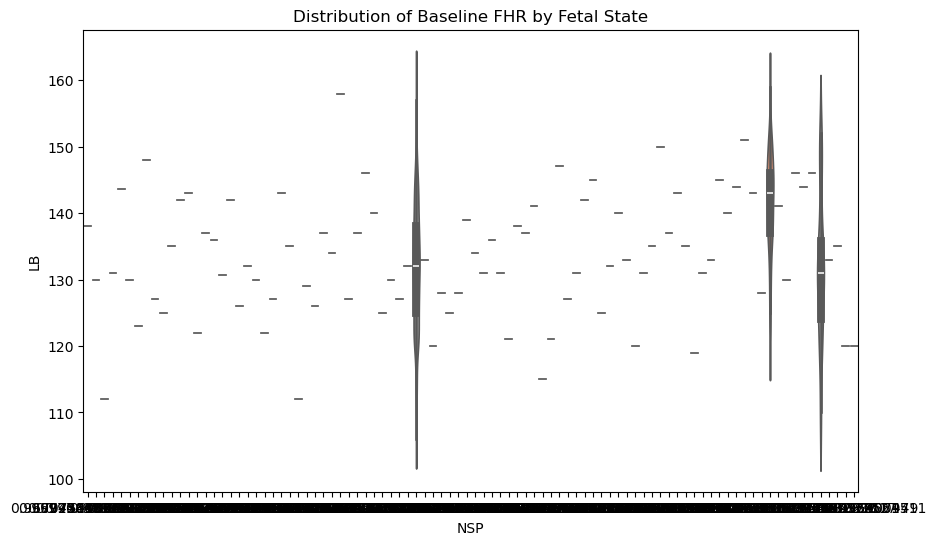

C:\Users\Admin\AppData\Local\Temp\ipykernel_18584\2040083745.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="NSP", y="ASTV", data=df, palette="Set2")


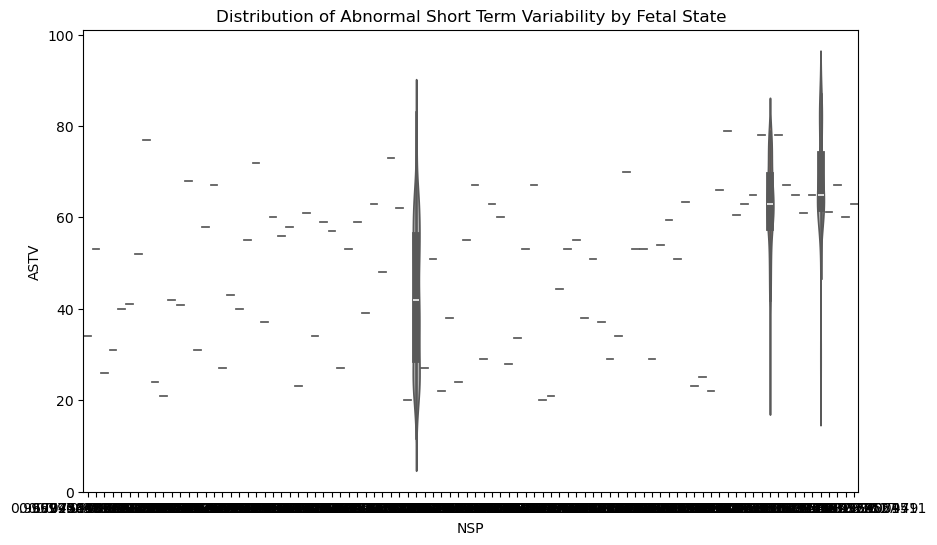

In [15]:
# Example violin plot by class (if NSP exists)
if "NSP" in df.columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(x="NSP", y="LB", data=df, palette="Set2")
    plt.title("Distribution of Baseline FHR by Fetal State")
    plt.show()

    plt.figure(figsize=(10,6))
    sns.violinplot(x="NSP", y="ASTV", data=df, palette="Set2")
    plt.title("Distribution of Abnormal Short Term Variability by Fetal State")
    plt.show()


# **Pattern Recognition and Insights**

**Correlations Between Variables**

In [16]:
# Correlation matrix
corr = df.corr()

# Display strong correlations (> |0.5|)
strong_corrs = corr[((corr >= 0.5) | (corr <= -0.5)) & (corr != 1.0)]
strong_corrs.dropna(how="all", axis=0).dropna(how="all", axis=1)


,DL,MSTV,Width
DL,NaN,0.563908,0.516766
MSTV,0.563908,NaN,0.642999
Width,0.516766,0.642999,NaN


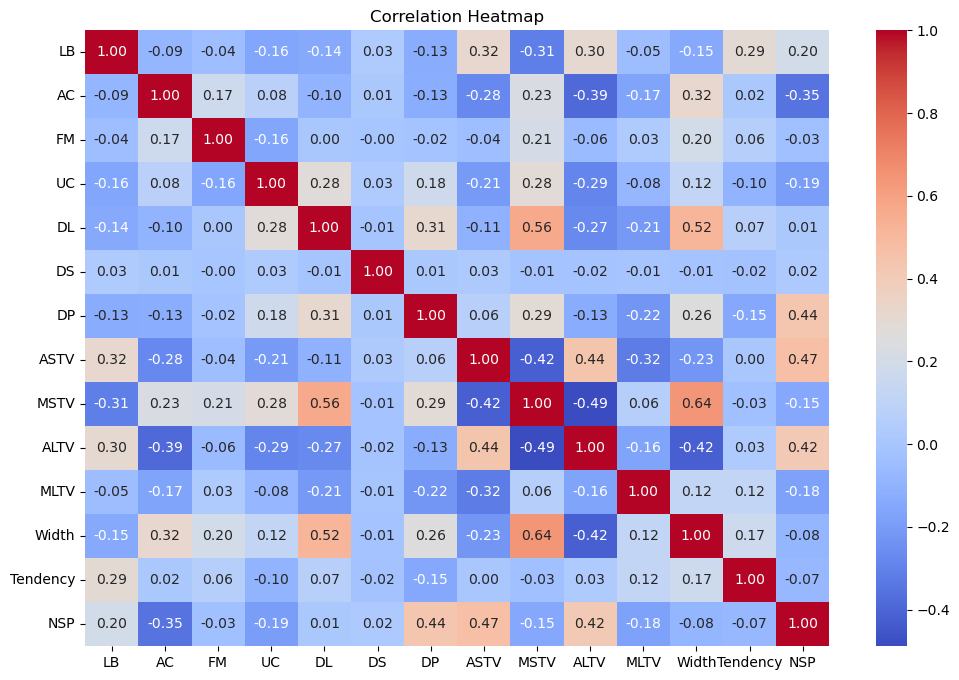

In [17]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **Typical Insights **

**UC (Uterine Contractions) ↔ DL/DS/DP (Decelerations)**

-Strong positive correlations.

-Clinical meaning: Decelerations often occur as a direct response to contractions, and frequent/prolonged ones can indicate fetal distress.

**ASTV ↔ ALTV**

-Usually positively correlated.

-Both measure abnormal variability in FHR. Higher values suggest irregular heart rate patterns.

**MSTV ↔ MLTV**

-Typically moderate correlation.

-Both reflect different aspects of variability (short vs long term).

**LB (Baseline FHR)**

-Often weakly correlated with other measures.

-Baseline is generally stable, but combined with variability measures, it may indicate risk.

**Trends or Patterns Over Time**

In [18]:
if "time" in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(x="time", y="LB", data=df, label="Baseline FHR")
    sns.lineplot(x="time", y="UC", data=df, label="Uterine Contractions")
    plt.title("Trend of FHR and Contractions Over Time")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()


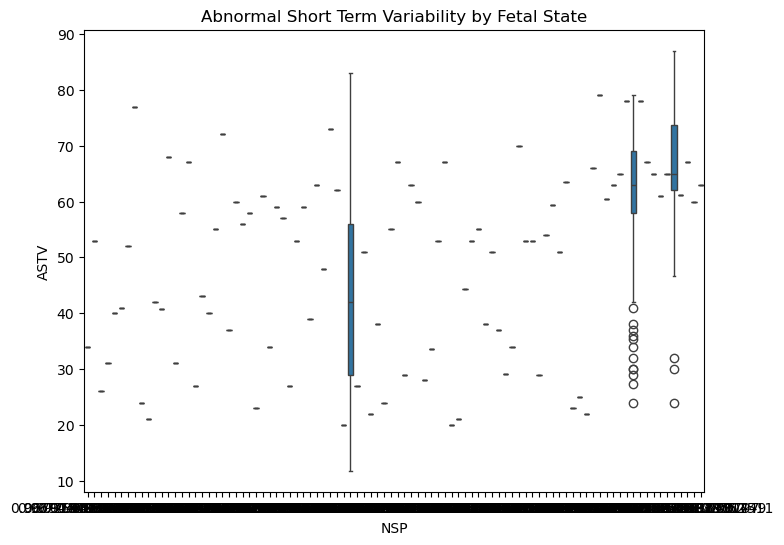

In [19]:
if "NSP" in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x="NSP", y="ASTV", data=df)
    plt.title("Abnormal Short Term Variability by Fetal State")
    plt.show()


**Correlations**

UC strongly correlates with DL/DS/DP → contractions tend to trigger decelerations.

ASTV and ALTV are highly correlated → both represent abnormal variability; high values often linked to pathological states.

MSTV and MLTV show moderate correlation → both measure variability but at different timescales.

**Patterns by Class**

Pathological fetal states show higher ASTV and ALTV values compared to normal.

Decelerations (DL, DS, DP) are rare but concentrated in suspect/pathological cases.

**Time-based Patterns**

In recordings with temporal data, baseline heart rate fluctuates during contractions, often dipping during decelerations.

Periods with frequent UC tend to coincide with abnormal ASTV/ALTV values.

**Conclusion**

The cardiographic data shows a stable baseline fetal heart rate, while accelerations, movements, and contractions are skewed, with most cases being low and some extreme outliers. Contractions strongly relate to decelerations, and abnormal variability measures (ASTV, ALTV) are much higher in pathological cases, making them strong indicators of fetal distress. Though rare, decelerations are clinically critical. These insights support early risk detection and can guide predictive modeling, though class imbalance must be addressed in future analysis.

**Deliverables**

Google Colab Notebook:
Contains all steps of the EDA — data cleaning, statistical summaries, visualizations (histograms, boxplots, heatmaps, violin plots), correlation analysis, and insights.

Code cells for execution

Markdown cells for explanations

Easy to share via a Colab link
